<a href="https://colab.research.google.com/github/Kevincancino26/Telecom-X-parte-2/blob/main/TelecomX_parte_2__modelo_predictivo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= kingblue>Proyecto Telecom X parte 2
----

#<font color=kingblue>Mission





Es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

---



#<font color=kingblue>Objetivo de desafio

* Preparar los datos para el modelado (tratamiento, codificación, normalización).

* Realizar análisis de correlación y selección de variables.

* Entrenar dos o más modelos de clasificación.

* Evaluar el rendimiento de los modelos con métricas.

* Interpretar los resultados, incluyendo la importancia de las variables.

* Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

#<font color=kingblue>Preparacion de datos

##<font color=kingblue> Extracción del Archivo Tratado

In [1]:
import pandas as pd

In [2]:
url='https://github.com/Kevincancino26/Telecom-X-parte-2/raw/main/df_normalizado_customer.xlsx'

df=pd.read_excel(url)
df.sample(10)

,customerID,Churn,genero del cliente,cliente senior,cliente con pareja,cliente con dependientes,Meses de contrato del cliente,cliente con servicio telefonico,cliente con multiples lineas,servicio de internet,...,proteccion de dispositivo,soporte tecnico,streaming tv,streaming movies,Tipo de contrato,Facturacion en linea,Metodo de pago,costo mensual,costo total,costos diarios
6099,8336-tavkx,no,female,mayor a 65 años,yes,no,72,yes,yes,dsl,...,yes,yes,no,yes,two year,no,bank transfer (automatic),78.45,5682.25,2.615000
4309,5919-tmrgd,yes,female,menor a 65 años,no,yes,1,yes,no,fiber optic,...,no,no,yes,no,month-to-month,yes,electronic check,79.35,79.35,2.645000
3619,4988-rzjhg,unkown,female,menor a 65 años,yes,no,8,yes,yes,fiber optic,...,no,no,no,yes,month-to-month,yes,electronic check,84.90,764.95,2.830000
4440,6086-esgrl,yes,female,menor a 65 años,no,no,1,yes,no,fiber optic,...,no,no,no,yes,month-to-month,no,credit card (automatic),80.15,80.15,2.671667
5172,7055-vkgda,yes,male,menor a 65 años,no,no,54,yes,no,fiber optic,...,no,yes,yes,yes,one year,yes,credit card (automatic),105.40,5643.40,3.513333
4451,6103-bocou,no,female,menor a 65 años,no,no,26,yes,yes,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,80.70,2193.00,2.690000
2930,4075-wkniu,no,female,menor a 65 años,yes,yes,0,yes,yes,dsl,...,yes,yes,yes,no,two year,no,mailed check,73.35,0.00,2.445000
1228,1755-rmcxh,no,male,menor a 65 años,yes,yes,2,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,month-to-month,no,mailed check,20.30,40.25,0.676667
430,0618-xwmss,yes,male,menor a 65 años,no,yes,28,yes,no,fiber optic,...,no,no,no,no,month-to-month,yes,bank transfer (automatic),74.90,2068.55,2.496667
2036,2869-adawr,yes,female,menor a 65 años,no,no,45,yes,yes,fiber optic,...,no,no,yes,no,month-to-month,yes,credit card (automatic),89.30,4016.85,2.976667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customerID                       7267 non-null   object 
 1   Churn                            7267 non-null   object 
 2   genero del cliente               7267 non-null   object 
 3   cliente senior                   7267 non-null   object 
 4   cliente con pareja               7267 non-null   object 
 5   cliente con dependientes         7267 non-null   object 
 6   Meses de contrato del cliente    7267 non-null   int64  
 7   cliente con servicio telefonico  7267 non-null   object 
 8   cliente con multiples lineas     7267 non-null   object 
 9   servicio de internet             7267 non-null   object 
 10  seguridad en linea               7267 non-null   object 
 11  backup en linea                  7267 non-null   object 
 12  proteccion de dispos

##<font color=kingblue> Eliminacion de columnas y filas irrelevantes

In [4]:
#lista de filas
df.columns.tolist()

['customerID',
 'Churn',
 'genero del cliente',
 'cliente senior',
 'cliente con pareja',
 'cliente con dependientes',
 'Meses de contrato del cliente',
 'cliente con servicio telefonico',
 'cliente con multiples lineas',
 'servicio de internet',
 'seguridad en linea',
 'backup en linea',
 'proteccion de dispositivo',
 'soporte tecnico',
 'streaming tv',
 'streaming movies',
 'Tipo de contrato',
 'Facturacion en linea',
 'Metodo de pago',
 'costo mensual',
 'costo total',
 'costos diarios']

se elimina la columa ID dado que es irrelevante para un modelo de prediccion


In [5]:
#eliminacion de la columna  custumerID
df=df.drop(columns=['customerID'],axis=1)
df

,Churn,genero del cliente,cliente senior,cliente con pareja,cliente con dependientes,Meses de contrato del cliente,cliente con servicio telefonico,cliente con multiples lineas,servicio de internet,seguridad en linea,...,proteccion de dispositivo,soporte tecnico,streaming tv,streaming movies,Tipo de contrato,Facturacion en linea,Metodo de pago,costo mensual,costo total,costos diarios
0,no,female,menor a 65 años,yes,yes,9,yes,no,dsl,no,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.186667
1,no,male,menor a 65 años,no,no,9,yes,yes,dsl,no,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40,1.996667
2,yes,male,menor a 65 años,no,no,4,yes,no,fiber optic,no,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.463333
3,yes,male,mayor a 65 años,yes,no,13,yes,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.266667
4,yes,female,mayor a 65 años,yes,no,3,yes,no,fiber optic,no,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,no,female,menor a 65 años,no,no,13,yes,no,dsl,yes,...,no,yes,no,no,one year,no,mailed check,55.15,742.90,1.838333
7263,yes,male,menor a 65 años,yes,no,22,yes,yes,fiber optic,no,...,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70,2.836667
7264,no,male,menor a 65 años,no,no,2,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,1.676667
7265,no,male,menor a 65 años,yes,yes,67,yes,no,dsl,yes,...,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,2.261667


In [6]:
for col in df:
  print(col,df[col].unique())

Churn ['no' 'yes' 'unkown']
genero del cliente ['female' 'male']
cliente senior ['menor a 65 años' 'mayor a 65 años']
cliente con pareja ['yes' 'no']
cliente con dependientes ['yes' 'no']
Meses de contrato del cliente [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
cliente con servicio telefonico ['yes' 'no']
cliente con multiples lineas ['no' 'yes' 'no phone service']
servicio de internet ['dsl' 'fiber optic' 'no']
seguridad en linea ['no' 'yes' 'no internet service']
backup en linea ['yes' 'no' 'no internet service']
proteccion de dispositivo ['no' 'yes' 'no internet service']
soporte tecnico ['yes' 'no' 'no internet service']
streaming tv ['yes' 'no' 'no internet service']
streaming movies ['no' 'yes' 'no internet service']
Tipo de contrato ['one year' 'month-to-month' 'two year']
Facturacion en linea ['yes' '

In [7]:
#eliminacion de las filas de datos unkown de churn
df['Churn'].unique()

array(['no', 'yes', 'unkown'], dtype=object)

los valores unkown no sirven para crear un modelo predictivo


In [8]:
#revisamos la cantidad de elementos desconocidos y eliminamos las filas de estos elementos
print("Filas con Churn = 'unknow':", df[df['Churn'] == 'unkown'].shape[0])
df_limpios= df[df['Churn'] != 'unkown']
print("Filas con Churn = 'unknow':", df_limpios[df_limpios['Churn'] == 'unkown'].shape[0])

Filas con Churn = 'unknow': 224
Filas con Churn = 'unknow': 0


In [9]:
df_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Churn                            7043 non-null   object 
 1   genero del cliente               7043 non-null   object 
 2   cliente senior                   7043 non-null   object 
 3   cliente con pareja               7043 non-null   object 
 4   cliente con dependientes         7043 non-null   object 
 5   Meses de contrato del cliente    7043 non-null   int64  
 6   cliente con servicio telefonico  7043 non-null   object 
 7   cliente con multiples lineas     7043 non-null   object 
 8   servicio de internet             7043 non-null   object 
 9   seguridad en linea               7043 non-null   object 
 10  backup en linea                  7043 non-null   object 
 11  proteccion de dispositivo        7043 non-null   object 
 12  soporte tecnico          

##<fon color kingblue> Encoding

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [11]:
columnas_categoricas=df_limpios.select_dtypes(include="object").columns.tolist()

Onehot=make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), columnas_categoricas),
    remainder='passthrough'  )# mantiene las columnas numericas sin alterar
# Aplicar transformacion de datos
dados_transformados = Onehot.fit_transform(df_limpios)

# crear en un data frame los datos crifrados
df_enco = pd.DataFrame(dados_transformados, columns=Onehot.get_feature_names_out())

# Visualizar resultado
df_enco.head()

,onehotencoder__Churn_no,onehotencoder__Churn_yes,onehotencoder__genero del cliente_female,onehotencoder__genero del cliente_male,onehotencoder__cliente senior_mayor a 65 años,onehotencoder__cliente senior_menor a 65 años,onehotencoder__cliente con pareja_no,onehotencoder__cliente con pareja_yes,onehotencoder__cliente con dependientes_no,onehotencoder__cliente con dependientes_yes,...,onehotencoder__Facturacion en linea_no,onehotencoder__Facturacion en linea_yes,onehotencoder__Metodo de pago_bank transfer (automatic),onehotencoder__Metodo de pago_credit card (automatic),onehotencoder__Metodo de pago_electronic check,onehotencoder__Metodo de pago_mailed check,remainder__Meses de contrato del cliente,remainder__costo mensual,remainder__costo total,remainder__costos diarios
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,9.0,65.6,593.30,2.186667
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,9.0,59.9,542.40,1.996667
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,4.0,73.9,280.85,2.463333
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,13.0,98.0,1237.85,3.266667
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,83.9,267.40,2.796667


In [12]:
df_enco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   onehotencoder__Churn_no                                       7043 non-null   float64
 1   onehotencoder__Churn_yes                                      7043 non-null   float64
 2   onehotencoder__genero del cliente_female                      7043 non-null   float64
 3   onehotencoder__genero del cliente_male                        7043 non-null   float64
 4   onehotencoder__cliente senior_mayor a 65 años                 7043 non-null   float64
 5   onehotencoder__cliente senior_menor a 65 años                 7043 non-null   float64
 6   onehotencoder__cliente con pareja_no                          7043 non-null   float64
 7   onehotencoder__cliente con pareja_yes                         7043 no

In [13]:
df_enco_excel=df_enco.to_excel('df_enco.xlsx')

##<font color=kingblue>Verificación de la Proporción de Cancelación (Churn)

In [14]:
proporcion=df_limpios['Churn'].value_counts(normalize=True)
proporcion

,proportion
Churn,
no,0.73463
yes,0.26537


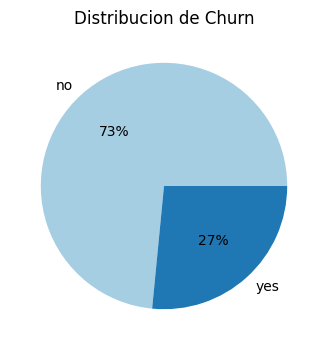

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
labels=proporcion.index
color=sns.color_palette("Paired")
plt.figure(figsize=(6, 4))
plt.pie(x=proporcion,labels=labels,autopct="%0.0f%%",colors=color, wedgeprops={'linewidth': 0.5})
plt.title('Distribucion de Churn')
plt.show()

In [16]:
datocorr=df_enco.corr('spearman')
datoscorr=pd.DataFrame(datocorr)
datoscorr_excel=datoscorr.to_excel('datoscorr.xlsx')

#<font color=kingblue>Correlación y Selección de Variables

##<font color=kingblue>Correlacion analisis

###Matriz de correlacion en base a churn_yes

In [17]:

# Calcular matriz de correlación de Spearman (mide relaciones monotónicas)
corr_matrix = datoscorr.corr(method='spearman')#se selecciona spearman dado que los datos no siguen una distribucion normal

# Mostrar correlaciones ordenadas con la variable objetivo 'Churn_yes'
churn_corr = corr_matrix['onehotencoder__Churn_yes'].sort_values(ascending=False)
print(churn_corr)

onehotencoder__Churn_yes                                        1.000000
onehotencoder__seguridad en linea_no                            0.931430
onehotencoder__cliente con dependientes_no                      0.928359
onehotencoder__soporte tecnico_no                               0.925391
onehotencoder__Tipo de contrato_month-to-month                  0.914441
onehotencoder__Metodo de pago_electronic check                  0.903695
onehotencoder__backup en linea_no                               0.890799
onehotencoder__proteccion de dispositivo_no                     0.873401
onehotencoder__Facturacion en linea_yes                         0.808208
onehotencoder__cliente senior_mayor a 65 años                   0.789684
onehotencoder__servicio de internet_fiber optic                 0.755603
onehotencoder__streaming movies_no                              0.725207
onehotencoder__streaming tv_no                                  0.722751
onehotencoder__cliente con pareja_no               

Se usa la variable Churn_yes dado que esta con la variable churn_no nos da -1 por lo tanto solo elejimos una de las dos, de preferencia la positiva para el estudio

###Selección de variables para el modelo

In [18]:
# Variables con correlación significativa (umbral: 0.2)
variables_modelo = churn_corr[abs(churn_corr) > 0.2].index.tolist()#abs es una función que devuelve el valor absoluto de un número.
# En este contexto, se está usando para considerar tanto correlaciones positivas como negativas que superen el umbral de 0.2.
pd.Series(variables_modelo,name='variables_modelo con correlacion significativa')

,variables_modelo con correlacion significativa
0,onehotencoder__Churn_yes
1,onehotencoder__seguridad en linea_no
2,onehotencoder__cliente con dependientes_no
3,onehotencoder__soporte tecnico_no
4,onehotencoder__Tipo de contrato_month-to-month
5,onehotencoder__Metodo de pago_electronic check
6,onehotencoder__backup en linea_no
7,onehotencoder__proteccion de dispositivo_no
8,onehotencoder__Facturacion en linea_yes
9,onehotencoder__cliente senior_mayor a 65 años


###Identificar Correlacion de Variables

In [19]:
# Matriz de correlación solo con variables seleccionadas
corr_modelo = datoscorr[variables_modelo].corr()

# Lista de variables colineales (correlación > 0.8 entre sí)
colineales = set()
for i in range(len(corr_modelo.columns)):
    for j in range(i):
        if abs(corr_modelo.iloc[i, j]) > 0.8:
            colineales.add(corr_modelo.columns[i])
colineales=list(colineales)
pd.Series(colineales,name='variables colineales')

,variables colineales
0,onehotencoder__Churn_no
1,remainder__costos diarios
2,onehotencoder__streaming tv_no internet service
3,onehotencoder__cliente senior_menor a 65 años
4,onehotencoder__proteccion de dispositivo_no
5,onehotencoder__cliente con multiples lineas_no
6,remainder__costo mensual
7,onehotencoder__streaming movies_no internet se...
8,onehotencoder__cliente con pareja_yes
9,onehotencoder__backup en linea_no


###Variables irrelevantes y redundantes

In [20]:
# Variables irrelevantes (correlación con Churn ≈ 0)
irrelevantes = churn_corr[abs(churn_corr) < 0.05].index.tolist()

# Variables redundantes (colineales + complementos one-hot)
redundantes = list(colineales) + [
    'onehotencoder__Churn_no',  # Complemento de Churn_yes
    'remainder__costos diarios' # Duplicado de 'remainder__costo mensual'
]


pd.Series(redundantes + irrelevantes,name='variables a eliminar')

,variables a eliminar
0,onehotencoder__Churn_no
1,remainder__costos diarios
2,onehotencoder__streaming tv_no internet service
3,onehotencoder__cliente senior_menor a 65 años
4,onehotencoder__proteccion de dispositivo_no
5,onehotencoder__cliente con multiples lineas_no
6,remainder__costo mensual
7,onehotencoder__streaming movies_no internet se...
8,onehotencoder__cliente con pareja_yes
9,onehotencoder__backup en linea_no


----
###Eliminacion de colinealidad,redundantes e irrelevantes

In [21]:
# Paso 1: Eliminar variables colineales de las seleccionadas inicialmente
variables_filtradas_colinealidad = [v for v in variables_modelo if v not in colineales]

# Paso 2: Eliminar variables redundantes e irrelevantes
Variables_cor_Modelo = [v for v in variables_filtradas_colinealidad
                       if v not in redundantes and v not in irrelevantes]

# Resultados finales
print("\nResumen completo:")
print("Variables iniciales para modelo:", len(variables_modelo))
print("Variables después de eliminar colinealidad:", len(variables_filtradas_colinealidad))
print("Variables finales para ML (Variables_cor_Modelo):", len(Variables_cor_Modelo))
print("\nLista definitiva para el modelo:")
print(Variables_cor_Modelo)

# Eliminación efectiva del DataFrame original (opcional)
df_final = datoscorr.drop(columns=redundantes + irrelevantes, errors='ignore')


Resumen completo:
Variables iniciales para modelo: 40
Variables después de eliminar colinealidad: 13
Variables finales para ML (Variables_cor_Modelo): 13

Lista definitiva para el modelo:
['onehotencoder__Churn_yes', 'onehotencoder__seguridad en linea_no', 'onehotencoder__cliente con dependientes_no', 'onehotencoder__Tipo de contrato_month-to-month', 'onehotencoder__Facturacion en linea_yes', 'onehotencoder__cliente senior_mayor a 65 años', 'onehotencoder__servicio de internet_fiber optic', 'onehotencoder__cliente con pareja_no', 'onehotencoder__genero del cliente_female', 'onehotencoder__cliente con multiples lineas_yes', 'onehotencoder__Metodo de pago_bank transfer (automatic)', 'onehotencoder__Metodo de pago_credit card (automatic)', 'onehotencoder__Tipo de contrato_one year']


1._Primero filtramos las variables del modelo inicial quitando las colineales

2._Luego aplicamos un segundo filtro para eliminar redundancias y variables irrelevantes

3._El resultado final se almacena en Variables_cor_Modelo

4._Opcionalmente podemos crear un nuevo DataFrame limpio

###Grafica Heatmaps

####Variables para el Modelo (Sin colinealidad)

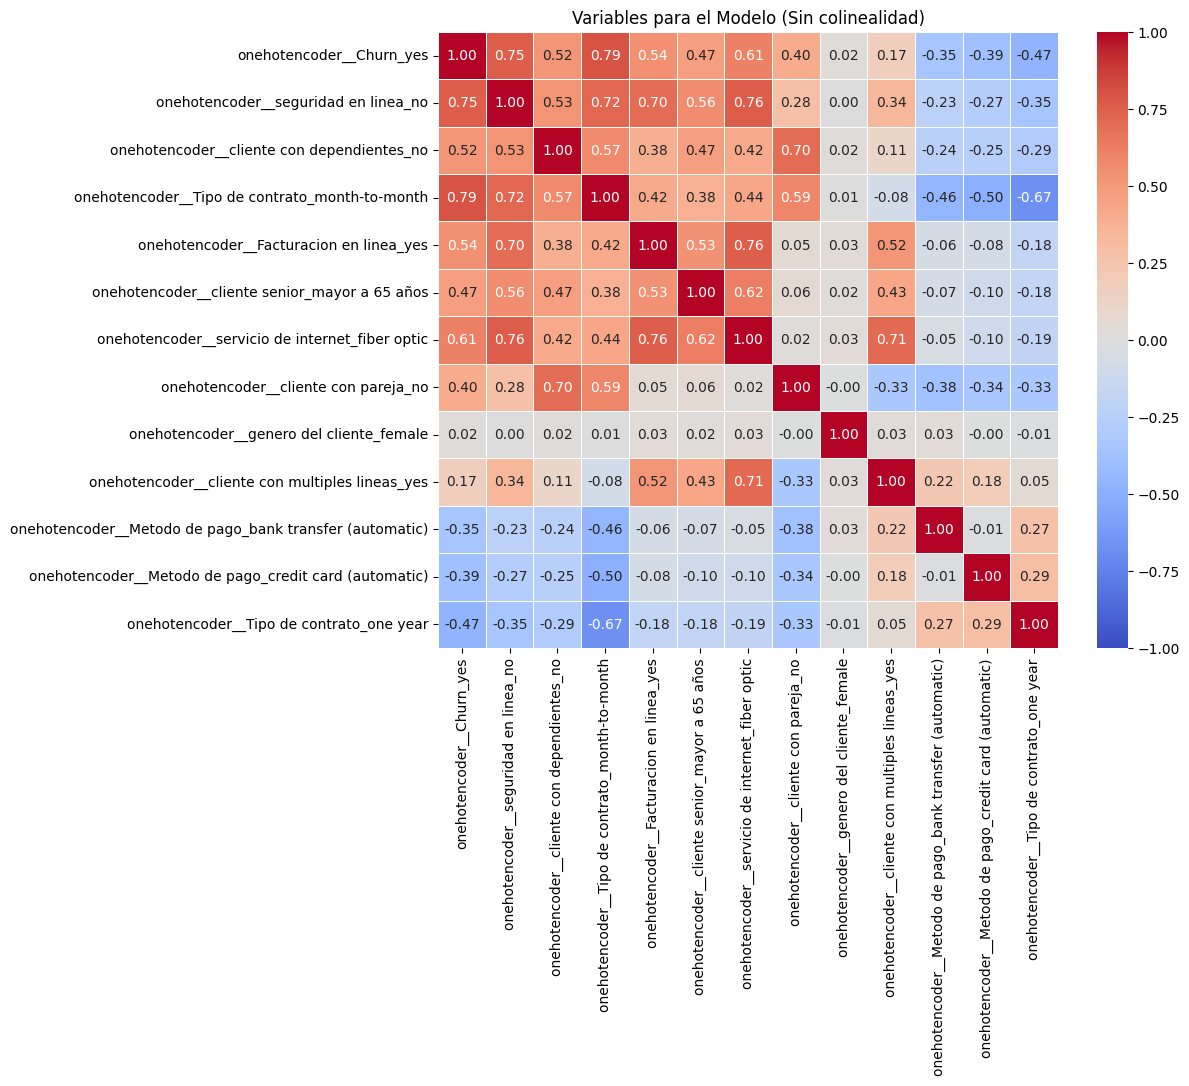

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    datoscorr[Variables_cor_Modelo].corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Variables para el Modelo (Sin colinealidad)")
plt.show()

####Variables Irrelevantes y Redundantes

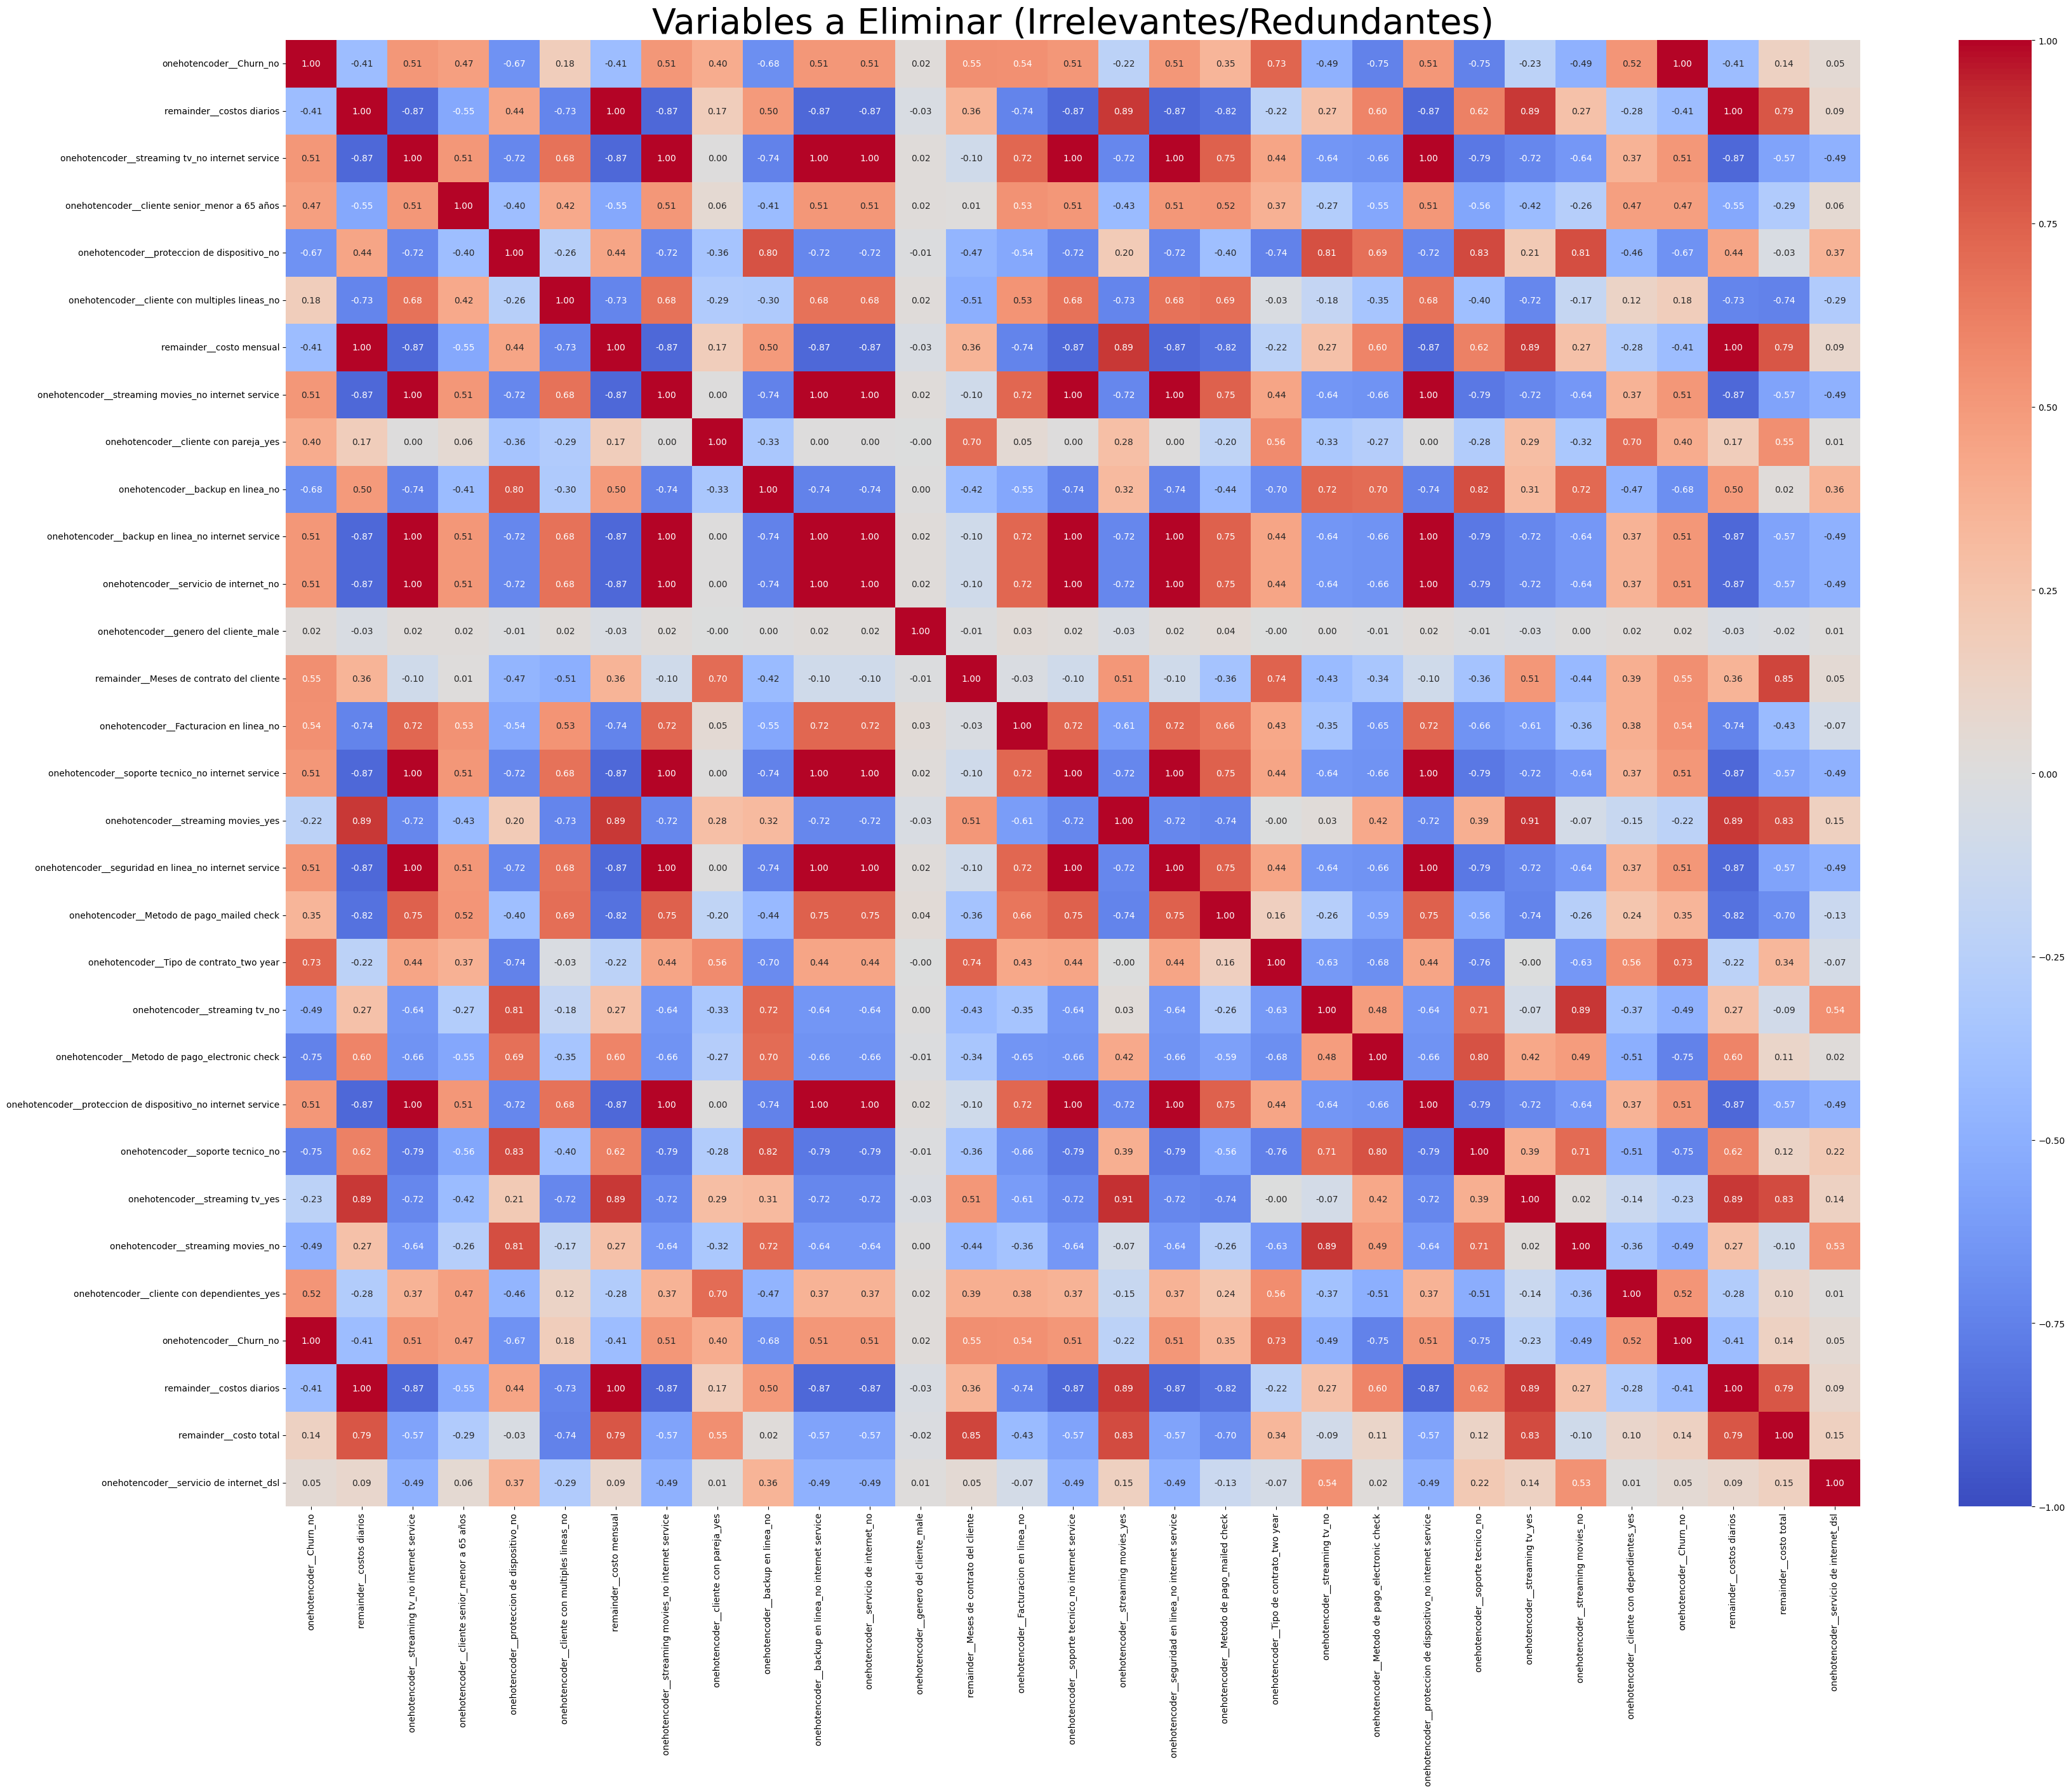

In [23]:
plt.figure(figsize=(40,30))
sns.heatmap(
    datoscorr[redundantes + irrelevantes].corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    fmt=".2f"
)
plt.title("Variables a Eliminar (Irrelevantes/Redundantes)", fontsize=40)
plt.show()

In [24]:
df_final.columns.tolist()

['onehotencoder__Churn_yes',
 'onehotencoder__genero del cliente_female',
 'onehotencoder__cliente senior_mayor a 65 años',
 'onehotencoder__cliente con pareja_no',
 'onehotencoder__cliente con dependientes_no',
 'onehotencoder__cliente con servicio telefonico_no',
 'onehotencoder__cliente con servicio telefonico_yes',
 'onehotencoder__cliente con multiples lineas_no phone service',
 'onehotencoder__cliente con multiples lineas_yes',
 'onehotencoder__servicio de internet_fiber optic',
 'onehotencoder__seguridad en linea_no',
 'onehotencoder__seguridad en linea_yes',
 'onehotencoder__backup en linea_yes',
 'onehotencoder__proteccion de dispositivo_yes',
 'onehotencoder__soporte tecnico_yes',
 'onehotencoder__Tipo de contrato_month-to-month',
 'onehotencoder__Tipo de contrato_one year',
 'onehotencoder__Facturacion en linea_yes',
 'onehotencoder__Metodo de pago_bank transfer (automatic)',
 'onehotencoder__Metodo de pago_credit card (automatic)']

In [25]:
df_final_excel=df_final.to_excel('df_final.xlsx')

In [26]:
df_final

,onehotencoder__Churn_yes,onehotencoder__genero del cliente_female,onehotencoder__cliente senior_mayor a 65 años,onehotencoder__cliente con pareja_no,onehotencoder__cliente con dependientes_no,onehotencoder__cliente con servicio telefonico_no,onehotencoder__cliente con servicio telefonico_yes,onehotencoder__cliente con multiples lineas_no phone service,onehotencoder__cliente con multiples lineas_yes,onehotencoder__servicio de internet_fiber optic,onehotencoder__seguridad en linea_no,onehotencoder__seguridad en linea_yes,onehotencoder__backup en linea_yes,onehotencoder__proteccion de dispositivo_yes,onehotencoder__soporte tecnico_yes,onehotencoder__Tipo de contrato_month-to-month,onehotencoder__Tipo de contrato_one year,onehotencoder__Facturacion en linea_yes,onehotencoder__Metodo de pago_bank transfer (automatic),onehotencoder__Metodo de pago_credit card (automatic)
onehotencoder__Churn_no,-1.000000,-0.008612,-0.150889,-0.150448,-0.164221,0.011942,-0.011942,0.011942,-0.040102,-0.308020,-0.342637,0.171226,0.082255,0.066160,0.164674,-0.405103,0.177820,-0.191825,0.117937,0.134302
onehotencoder__Churn_yes,1.000000,0.008612,0.150889,0.150448,0.164221,-0.011942,0.011942,-0.011942,0.040102,0.308020,0.342637,-0.171226,-0.082255,-0.066160,-0.164674,0.405103,-0.177820,0.191825,-0.117937,-0.134302
onehotencoder__genero del cliente_female,0.008612,1.000000,0.001874,-0.001808,0.010517,-0.006488,0.006488,-0.006488,0.008414,0.011286,-0.010429,0.017021,0.013773,0.002105,0.009212,0.003386,-0.008026,0.011754,0.016024,-0.001215
onehotencoder__genero del cliente_male,-0.008612,-1.000000,-0.001874,0.001808,-0.010517,0.006488,-0.006488,0.006488,-0.008414,-0.011286,0.010429,-0.017021,-0.013773,-0.002105,-0.009212,-0.003386,0.008026,-0.011754,-0.016024,0.001215
onehotencoder__cliente senior_mayor a 65 años,0.150889,0.001874,1.000000,-0.016479,0.211185,-0.008576,0.008576,-0.008576,0.142948,0.255338,0.185532,-0.038653,0.066572,0.059428,-0.060625,0.138360,-0.046262,0.156530,-0.016159,-0.024135
onehotencoder__cliente senior_menor a 65 años,-0.150889,-0.001874,-1.000000,0.016479,-0.211185,0.008576,-0.008576,0.008576,-0.142948,-0.255338,-0.185532,0.038653,-0.066572,-0.059428,0.060625,-0.138360,0.046262,-0.156530,0.016159,0.024135
onehotencoder__cliente con pareja_no,0.150448,-0.001808,-0.016479,1.000000,0.452676,0.017706,-0.017706,0.017706,-0.142057,-0.000304,0.129936,-0.143106,-0.141498,-0.153786,-0.119999,0.280865,-0.082783,0.014877,-0.110706,-0.082029
onehotencoder__cliente con pareja_yes,-0.150448,0.001808,0.016479,-1.000000,-0.452676,-0.017706,0.017706,-0.017706,0.142057,0.000304,-0.129936,0.143106,0.141498,0.153786,0.119999,-0.280865,0.082783,-0.014877,0.110706,0.082029
onehotencoder__cliente con dependientes_no,0.164221,0.010517,0.211185,0.452676,1.000000,-0.001762,0.001762,-0.001762,0.024526,0.165818,0.188434,-0.080972,-0.023671,-0.013963,-0.063268,0.231720,-0.068368,0.111377,-0.052021,-0.060267
onehotencoder__cliente con dependientes_yes,-0.164221,-0.010517,-0.211185,-0.452676,-1.000000,0.001762,-0.001762,0.001762,-0.024526,-0.165818,-0.188434,0.080972,0.023671,0.013963,0.063268,-0.231720,0.068368,-0.111377,0.052021,0.060267


##<font color=kingblue>Análisis Dirigido

In [27]:
import plotly.express as px

In [28]:
fig = px.box(df_limpios,
             x='Meses de contrato del cliente',
             y='Churn',
             color="Churn",
             color_discrete_sequence=["#DD4477", "#19D3F3"],
             category_orders={"Churn": ['Yes', 'No']},
             title="Costo total X Churn")
fig.show()

In [29]:
fig = px.box(df_limpios,
             x='costo total',
             y='Churn',
             color="Churn",
             color_discrete_sequence=["#DD4477", "#19D3F3"],
             category_orders={"Churn": ['Yes', 'No']},
             title="Costo total X Churn")
fig.show()



In [30]:
import plotly.express as px

fig = px.scatter(
    df_limpios,
    x='Meses de contrato del cliente',
    y='costo total',
    color='Churn',  # Asigna colores según 'Churn' (Yes/No)
    color_discrete_sequence=['red', 'green'],  # Rojo para "Yes", verde para "No"
    title='Relación entre Meses de Contrato y Costo Total (por Churn)',
    labels={
        'Meses de contrato del cliente': 'Meses de contrato',
        'costo total': 'Costo total (USD)',
        'Churn': 'Abandono'  # Renombrar la leyenda de 'Churn'
    },
    hover_data=['Churn']  # Opcional: muestra 'Churn' al pasar el mouse
)

# Personalizar ejes y diseño (opcional)
fig.update_layout(
    xaxis_title='Duración del contrato (meses)',
    yaxis_title='Costo total del cliente',
    legend_title_text='¿Abandonó?'
)

fig.show()

# <font color=kingblue>Modelado Predictivo

##Separación de Datos

Se divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df_enco.drop(['onehotencoder__Churn_no', 'onehotencoder__Churn_yes'], axis=1)
y = df_enco['onehotencoder__Churn_yes']

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42,test_size=0.3)



In [34]:

print(" Tamaño X_train:", X_train.shape)
print(" Tamaño X_test :", X_test.shape)

 Tamaño X_train: (4930, 47)
 Tamaño X_test : (2113, 47)


##Normalización o Estandarización (si es necesario)


Usamos la función StandardScaler para normalizar los datos de entrenamiento antes de aplicar el modelo de regresión logística porque este algoritmo utiliza métodos de optimización, como gradient descent, que convergen más rápido y de manera más estable cuando las variables están en una escala similar.
La normalización evita que las características con valores grandes dominen el cálculo de los coeficientes y mejora la precisión numérica del modelo.

In [35]:
from sklearn.preprocessing import StandardScaler

##<font color=kingblue>Creando Modelos

###Corriendo modelos 1

####Modelo de Regression Logitica

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
modelo_lr=Pipeline([(
    'Normalizador', StandardScaler()),
     ('Modelo', LogisticRegression(random_state=42, max_iter=1000))
])
# Entrenar
modelo_lr.fit(X_train,y_train)

#Prueba
y_pred_lr=modelo_lr.predict(X_test)


Regresión Logística: Este modelo ess sensible a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

####Modelo RandomForest

 Es ideal para datos numerico y categoricos como los datos que tenemos de los clientes, asi mismo nos permite multipless divisione de arboles

In [37]:
from sklearn.ensemble import RandomForestClassifier
modelo_rf=RandomForestClassifier(n_estimators=200,random_state=42,max_depth=5,min_samples_leaf=2)
# Entrenar
modelo_rf.fit(X_train,y_train)

#Prueba
y_pred_Rf=modelo_rf.predict(X_test)



In [38]:
print(f'El puntaje del moldeo de regresion logistica es: {modelo_lr.score(X_test,y_test)}')
print(f'El puntaje del moldeo de RandomForest es: {modelo_rf.score(X_test,y_test)}')

El puntaje del moldeo de regresion logistica es: 0.7988641741599621
El puntaje del moldeo de RandomForest es: 0.791292001893043


## <font color=kingblue>Evaluación de los Modelos

Se evaluara cada uno de los modelos con las iguientes metricas:

* Exactitud (Acurácia)

* Precisión

* Recall

* F1-score

* Matriz de confusión

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

###Evaluacion 1

#### Modelo de Regrecion Logistica

#####Metricas de entrenamiento

Métricas del modelo de Regresión Logística (Entrenamiento)

Exactitud: 0.8115618661257606
Precisión: 0.6721162579473207
Sensibilidad (Recall): 0.5657492354740061
F1-Score: 0.614362806143628


Matriz de confusión:
[[3261  361]
 [ 568  740]]


El resumen del modelo (Entrenamiento) que muestra las pretricass de presicion, recall y f1-core del modelo 
 Regreion Logistica es el siguiente:

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      3622
         1.0       0.67      0.57      0.61      1308

    accuracy                           0.81      4930
   macro avg       0.76      0.73      0.74      4930
weighted avg       0.80      0.81      0.81      4930



Grafica de Matris de Confuion Regresion Logica(Entrenamiento)



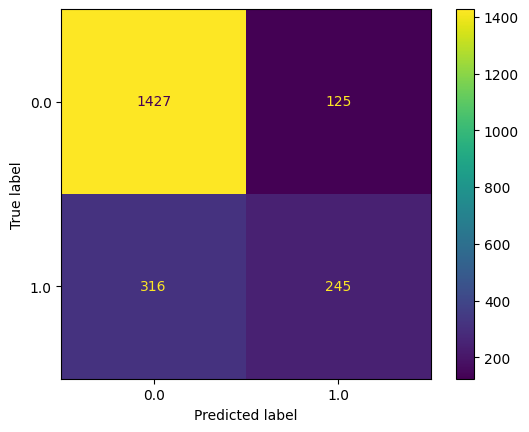

In [40]:
# Predicciones con datos de entrenamiento
y_train_pred_lr = modelo_lr.predict(X_train)

print('Métricas del modelo de Regresión Logística (Entrenamiento)\n')
print(f'Exactitud: {accuracy_score(y_train, y_train_pred_lr)}')
print(f'Precisión: {precision_score(y_train, y_train_pred_lr)}')
print(f'Sensibilidad (Recall): {recall_score(y_train, y_train_pred_lr)}')
print(f'F1-Score: {f1_score(y_train, y_train_pred_lr)}')
print('\n')
print(f'Matriz de confusión:\n{confusion_matrix(y_train, y_train_pred_lr)}')
print('\n')
print('El resumen del modelo (Entrenamiento) que muestra las pretricass de presicion, recall y f1-core del modelo \n Regreion Logistica es el siguiente:\n')
print(f'{classification_report(y_train, y_train_pred_lr)}')
print('\n')
print('Grafica de Matris de Confuion Regresion Logica(Entrenamiento)\n')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_Rf);

#####Metricas de prueba

Metricas del modelo de Random Foret 

 la exactitud del modelo es: 0.7988641741599621
 la preciion del modelo es: 0.6428571428571429
 la sencibilidad(recall) del modelo es: 0.5454545454545454
 la F1-Score del modelo es: 0.5901639344262295


 la matriz de confucion del modelo es: 
[[1382  170]
 [ 255  306]]


El resumen del modelo que muestra las pretricass de presicion, recall y f1-core del modelo 
 Regreion Logistica es el siguiente:

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1552
         1.0       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



Grafica de Matris de Confucion Random Forest 



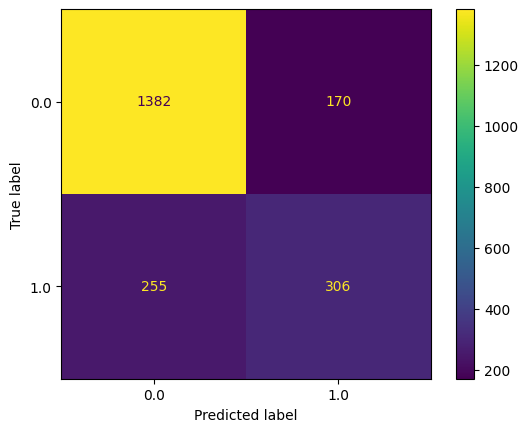

In [41]:
#prediccion con datos de prueba
print('Metricas del modelo de Random Foret \n')

print(f' la exactitud del modelo es: {accuracy_score(y_test,y_pred_lr)}')
print(f' la preciion del modelo es: {precision_score(y_test,y_pred_lr)}')
print(f' la sencibilidad(recall) del modelo es: {recall_score(y_test,y_pred_lr)}')
print(f' la F1-Score del modelo es: {f1_score(y_test,y_pred_lr)}')
print('\n')
print(f' la matriz de confucion del modelo es: \n{confusion_matrix(y_test,y_pred_lr)}')
print('\n')
print('El resumen del modelo que muestra las pretricass de presicion, recall y f1-core del modelo \n Regreion Logistica es el siguiente:\n')
print(f'{classification_report(y_test,y_pred_lr)}')
print('\n')
print('Grafica de Matris de Confucion Random Forest \n')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr);

####Modelo RandomForest

#####Metricas de entrenamiento

Métricas del modelo Random Forest (Entrenamiento)

Exactitud: 0.8095334685598378
Precisión: 0.7094211123723042
Sensibilidad (Recall): 0.47782874617737003
F1-Score: 0.5710370031978073


Matriz de confusión:
[[3366  256]
 [ 683  625]]


El resumen del modelo (Entrenamiento) que muestra las pretricass de presicion, recall y f1-core del modelo 
 Random Forest es el siguiente:

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88      3622
         1.0       0.71      0.48      0.57      1308

    accuracy                           0.81      4930
   macro avg       0.77      0.70      0.72      4930
weighted avg       0.80      0.81      0.80      4930



Grafica de Matris de Confucion Random Forest (Entrenamiento)



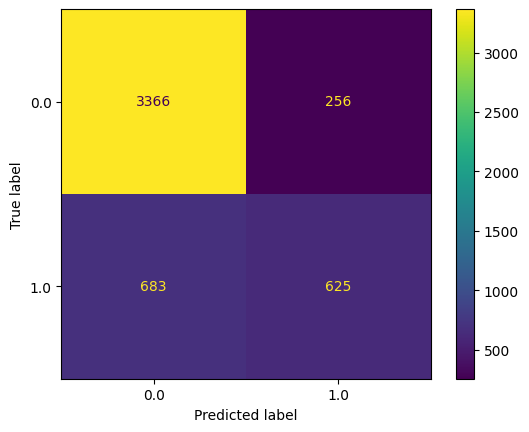

In [42]:

# Predicciones con datos de entrenamiento
y_train_pred_rf = modelo_rf.predict(X_train)

print('Métricas del modelo Random Forest (Entrenamiento)\n')
print(f'Exactitud: {accuracy_score(y_train, y_train_pred_rf)}')
print(f'Precisión: {precision_score(y_train, y_train_pred_rf)}')
print(f'Sensibilidad (Recall): {recall_score(y_train, y_train_pred_rf)}')
print(f'F1-Score: {f1_score(y_train, y_train_pred_rf)}')
print('\n')
print(f'Matriz de confusión:\n{confusion_matrix(y_train, y_train_pred_rf)}')
print('\n')
print('El resumen del modelo (Entrenamiento) que muestra las pretricass de presicion, recall y f1-core del modelo \n Random Forest es el siguiente:\n')
print(f'{classification_report(y_train, y_train_pred_rf)}')
print('\n')
print('Grafica de Matris de Confucion Random Forest (Entrenamiento)\n')
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_rf);

#####Metricas de prueba

Metricas del modelo de RandomForest

 la exactitud del modelo es: 0.791292001893043
 la preciion del modelo es: 0.6621621621621622
 la sencibilidad(recall) del modelo es: 0.43672014260249553
 la F1-Score del modelo es: 0.5263157894736842
 la matriz de confucion del modelo es: 
[[1427  125]
 [ 316  245]]


El resumen del modelo que muestra las pretricass de presicion, recall y f1-core del modelo 
 randon forest est el siguiente:

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1552
         1.0       0.66      0.44      0.53       561

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



Grafica de Matris de Confucion



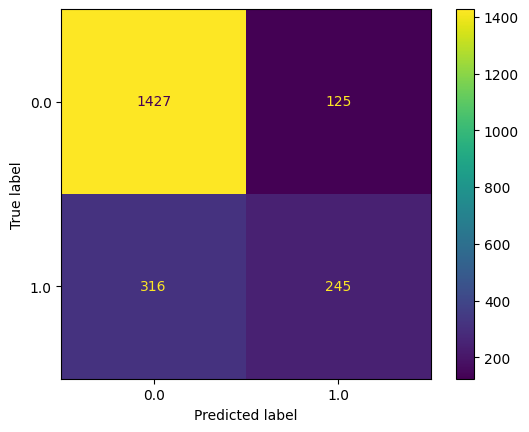

In [43]:
#Metricas con datos de prueba
print('Metricas del modelo de RandomForest\n')
print(f' la exactitud del modelo es: {accuracy_score(y_test,y_pred_Rf)}')
print(f' la preciion del modelo es: {precision_score(y_test,y_pred_Rf)}')
print(f' la sencibilidad(recall) del modelo es: {recall_score(y_test,y_pred_Rf)}')
print(f' la F1-Score del modelo es: {f1_score(y_test,y_pred_Rf)}')
print(f' la matriz de confucion del modelo es: \n{confusion_matrix(y_test,y_pred_Rf)}')
print('\n')
print('El resumen del modelo que muestra las pretricass de presicion, recall y f1-core del modelo \n randon forest est el siguiente:\n')
print(f'{classification_report(y_test,y_pred_Rf)}')
print('\n')
print('Grafica de Matris de Confucion\n')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_Rf);

####Resumen de la metricas 1

Analissando los reultado el modelo de regrecion logistica tuvo mejor desempeño
* Mayor exactitud (0.799 vs 0.791)

* Mayor sensibilidad (0.545 vs 0.437)

* Mayor F1-Score (0.590 vs 0.526)

Esto indica que logra un mejor equilibrio entre precisión y capacidad de detectar positivos, en esste caso clientes que pretenden abandonar los servicios



Ninguno muestra un salto muy grande entre métricas de entrenamiento y prueba, así que no hay sobreajuste fuerte, es decri, no presenta Overfitting

Ambos presentan métricas moderadas (recall y F1 no superan 0.62 ni en entrenamiento), lo que indica que ninguno está capturando todo el patrón de los datos, siendo presente un cierto Underfitting

####Mejorando hiperparametros con GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV

#####Random Forest con GridSearchCV

In [45]:
# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el GridSearch con validación cruzada (cv=5)
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='f1',   # Métrica a optimizar
    cv=5,
    n_jobs=-1,      # Usa todos los núcleos del procesador
    verbose=1
)

# Ejecutar búsqueda con los datos de entrenamiento
grid_rf.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores hiperparámetros Random Forest:", grid_rf.best_params_)

# Modelo final ajustado
modelo_rf_2 = grid_rf.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 200}


#####Regresión Logística con GridSearchCV

In [46]:
# Crear pipeline con normalización y modelo
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

# Espacio de búsqueda para el parámetro de regularización C
param_grid_lr = {
    'model__C': [0.1, 1, 2, 5, 10],
    'model__penalty': ['l2'],  # Regularización L2
    'model__solver': ['lbfgs'] # Solver compatible con L2 y multi-clase
}

grid_lr = GridSearchCV(
    estimator=pipe_lr,
    param_grid=param_grid_lr,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Ejecutar búsqueda
grid_lr.fit(X_train, y_train)

# Mejor combinación
print("Mejores hiperparámetros Regresión Logística:", grid_lr.best_params_)

# Modelo final ajustado
modelo_lr_2 = grid_lr.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejores hiperparámetros Regresión Logística: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


###Corriendo modelos 2

###RandomForest parametros mejorados

In [47]:
modelo_rf_2.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

In [48]:
modelo_rf_2_y_pred=modelo_rf_2.predict(X_test)

In [49]:
print(f'El puntaje del moldeo de RandomForest sin metricas mejoradas es: {modelo_rf.score(X_test,y_test):2f}')
print(f'El puntaje del moldeo de RandomForest metricas mejoradas es:{modelo_rf_2.score(X_test,y_test):2f}\n')
print(f'Teniendo una mejora de {modelo_rf_2.score(X_test,y_test)-modelo_rf.score(X_test,y_test):2f}')

El puntaje del moldeo de RandomForest sin metricas mejoradas es: 0.791292
El puntaje del moldeo de RandomForest metricas mejoradas es:0.794605

Teniendo una mejora de 0.003313


###Regresion Logisistica parametros mejorados

In [50]:
modelo_lr_2.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=10, max_iter=1000, random_state=42))])

In [51]:
modelo_lr_2_y_pred=modelo_lr_2.predict(X_test)

In [52]:
print(f'El puntaje del moldeo de Regresion Logisistica sin metricas mejoradas es: {modelo_lr_2.score(X_test,y_test):2f}')
print(f'El puntaje del moldeo de Regresion Logisistica metricas mejoradas es:{modelo_lr_2.score(X_test,y_test):2f}\n')
print(f'Teniendo una mejora de {modelo_lr_2.score(X_test,y_test)-modelo_lr_2.score(X_test,y_test):2f}')

El puntaje del moldeo de Regresion Logisistica sin metricas mejoradas es: 0.798391
El puntaje del moldeo de Regresion Logisistica metricas mejoradas es:0.798391

Teniendo una mejora de 0.000000


###Evaluacion 2

###### RandomForest parametros mejorados

Metricas del modelo de RandomForest parametros mejorados

 la exactitud del modelo es: 0.7946048272598202
 la preciion del modelo es: 0.6426966292134831
 la sencibilidad(recall) del modelo es: 0.5098039215686274
 la F1-Score del modelo es: 0.5685884691848907
 la matriz de confucion del modelo es: 
[[1393  159]
 [ 275  286]]


El resumen del modelo que muestra las pretricass de presicion, recall y f1-core del modelo 
 randon forest parametros mejorados es el siguiente:

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1552
         1.0       0.64      0.51      0.57       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.79      0.79      2113



Grafica de Matris de Confucion parametros mejorados



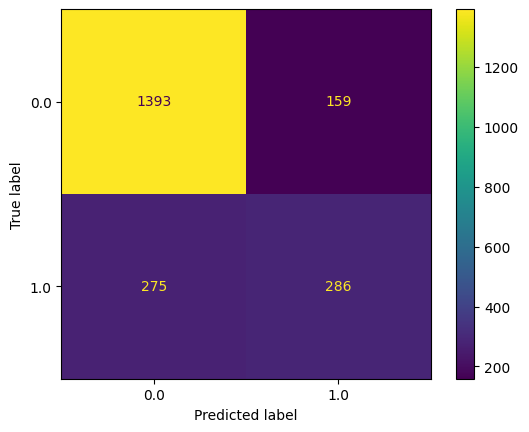

In [53]:
print('Metricas del modelo de RandomForest parametros mejorados\n')
print(f' la exactitud del modelo es: {accuracy_score(y_test,modelo_rf_2_y_pred)}')
print(f' la preciion del modelo es: {precision_score(y_test,modelo_rf_2_y_pred)}')
print(f' la sencibilidad(recall) del modelo es: {recall_score(y_test,modelo_rf_2_y_pred)}')
print(f' la F1-Score del modelo es: {f1_score(y_test,modelo_rf_2_y_pred)}')
print(f' la matriz de confucion del modelo es: \n{confusion_matrix(y_test,modelo_rf_2_y_pred)}')
print('\n')
print('El resumen del modelo que muestra las pretricass de presicion, recall y f1-core del modelo \n randon forest parametros mejorados es el siguiente:\n')
print(f'{classification_report(y_test,modelo_rf_2_y_pred)}')
print('\n')
print('Grafica de Matris de Confucion parametros mejorados\n')
ConfusionMatrixDisplay.from_predictions(y_test,modelo_rf_2_y_pred);

###### Regresioon Logistica parametros mejorados

Metricas del modelo de Regresion Logistica parametros mejorados 

 la exactitud del modelo es: 0.7983909133932797
 la preciion del modelo es: 0.6403326403326404
 la sencibilidad(recall) del modelo es: 0.5490196078431373
 la F1-Score del modelo es: 0.5911708253358925


 la matriz de confucion del modelo es: 
[[1379  173]
 [ 253  308]]


El resumen del modelo que muestra las pretricass de presicion, recall y f1-core del modelo 
 Regreion Logistica es el siguiente:

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1552
         1.0       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



Grafica de Matris de Confucion Random Forest 



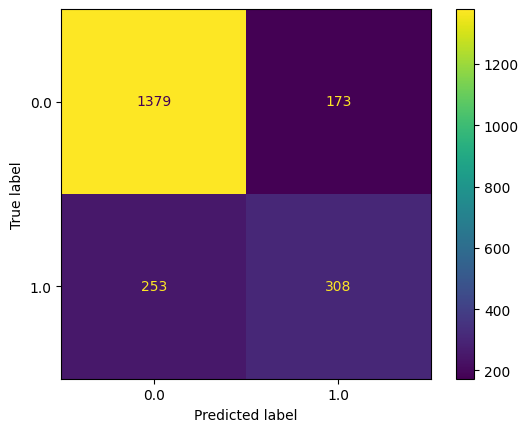

In [54]:
print('Metricas del modelo de Regresion Logistica parametros mejorados \n')

print(f' la exactitud del modelo es: {accuracy_score(y_test,modelo_lr_2_y_pred)}')
print(f' la preciion del modelo es: {precision_score(y_test,modelo_lr_2_y_pred)}')
print(f' la sencibilidad(recall) del modelo es: {recall_score(y_test,modelo_lr_2_y_pred)}')
print(f' la F1-Score del modelo es: {f1_score(y_test,modelo_lr_2_y_pred)}')
print('\n')
print(f' la matriz de confucion del modelo es: \n{confusion_matrix(y_test,modelo_lr_2_y_pred)}')
print('\n')
print('El resumen del modelo que muestra las pretricass de presicion, recall y f1-core del modelo \n Regreion Logistica es el siguiente:\n')
print(f'{classification_report(y_test,modelo_lr_2_y_pred)}')
print('\n')
print('Grafica de Matris de Confucion Random Forest \n')
ConfusionMatrixDisplay.from_predictions(y_test,modelo_lr_2_y_pred);

####Resumen de la metricas 2

Comparacion de metricas

| Modelo                  | Exactitud Antes | Exactitud Mejorado | Precisión Antes | Precisión Mejorado | Recall Antes | Recall Mejorado | F1 Antes | F1 Mejorado |
| ----------------------- | --------------- | ------------------ | --------------- | ------------------ | ------------ | --------------- | -------- | ----------- |
| **Random Forest**       | 0.7913          | 0.7946             | 0.6622          | 0.6427             | 0.4367       | **0.5098**      | 0.5263   | **0.5686**  |
| **Regresión Logística** | 0.7989          | 0.7984             | 0.6429          | 0.6403             | 0.5455       | **0.5490**      | 0.5902   | **0.5912**  |


**Observaciones**

**Random Forest**:

Mejoró notablemente el recall (+0.073) y el F1-score (+0.042), lo que significa que ahora detecta más clientes que se irán.

Ligera baja en precisión (-0.019), lo esperado cuando aumentamos recall.

Exactitud subió levemente (+0.0033).

La matriz de confusión muestra menos falsos negativos que antes.

**Regresión Logística**:

Mejoras pequeñas en recall (+0.0035) y F1 (+0.001).

Exactitud y precisión prácticamente se mantuvieron iguales (solo con cambios minimos).

La matriz de confusión muestra un leve incremento en verdaderos positivos.

###Balanceo de datos

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
oversampling = SMOTE(random_state=42)
X_train_bal, y_train_bal = oversampling.fit_resample(X_train, y_train)

###Corriendo modelos 3

###RandomForest parametros mejorados + Balanceo (SMOTE)

In [57]:
modelo_rf_2.fit(X_train_bal, y_train_bal)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

In [58]:
modelo_rf_2_y_pred=modelo_rf_2.predict(X_test)

###Regresion Logisistica parametros mejorados+ Balanceo (SMOTE)

In [59]:
modelo_lr_2.fit(X_train_bal, y_train_bal)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=10, max_iter=1000, random_state=42))])

In [60]:
modelo_lr_2_y_pred=modelo_lr_2.predict(X_test)

###Evaluacion 3

###### RandomForest parametros mejorados + balanceo

Metricas del modelo de RandomForest parametros mejorados + balanceo

 la exactitud del modelo es: 0.7789872219592996
 la preciion del modelo es: 0.5804794520547946
 la sencibilidad(recall) del modelo es: 0.6042780748663101
 la F1-Score del modelo es: 0.5921397379912664
 la matriz de confucion del modelo es: 
[[1307  245]
 [ 222  339]]


El resumen del modelo que muestra las pretricass de presicion, recall y f1-core del modelo 
 randon forest parametros mejorados es el siguiente:

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85      1552
         1.0       0.58      0.60      0.59       561

    accuracy                           0.78      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.78      0.78      0.78      2113



Grafica de Matris de Confucion parametros mejorados



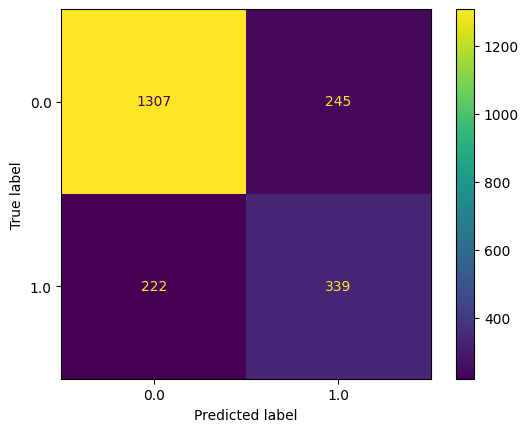

In [61]:
print('Metricas del modelo de RandomForest parametros mejorados + balanceo\n')
print(f' la exactitud del modelo es: {accuracy_score(y_test,modelo_rf_2_y_pred)}')
print(f' la preciion del modelo es: {precision_score(y_test,modelo_rf_2_y_pred)}')
print(f' la sencibilidad(recall) del modelo es: {recall_score(y_test,modelo_rf_2_y_pred)}')
print(f' la F1-Score del modelo es: {f1_score(y_test,modelo_rf_2_y_pred)}')
print(f' la matriz de confucion del modelo es: \n{confusion_matrix(y_test,modelo_rf_2_y_pred)}')
print('\n')
print('El resumen del modelo que muestra las pretricass de presicion, recall y f1-core del modelo \n randon forest parametros mejorados es el siguiente:\n')
print(f'{classification_report(y_test,modelo_rf_2_y_pred)}')
print('\n')
print('Grafica de Matris de Confucion parametros mejorados\n')
ConfusionMatrixDisplay.from_predictions(y_test,modelo_rf_2_y_pred);

###### Regresioon Logistica parametros mejorados

Metricas del modelo de Regresion Logistica parametros mejorados + balanceo

 la exactitud del modelo es: 0.7468054898248935
 la preciion del modelo es: 0.5149082568807339
 la sencibilidad(recall) del modelo es: 0.8003565062388592
 la F1-Score del modelo es: 0.6266573621772505


 la matriz de confucion del modelo es: 
[[1129  423]
 [ 112  449]]


El resumen del modelo que muestra las pretricass de presicion, recall y f1-core del modelo 
 Regreion Logistica es el siguiente:

              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1552
         1.0       0.51      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



Grafica de Matris de Confucion Random Forest 



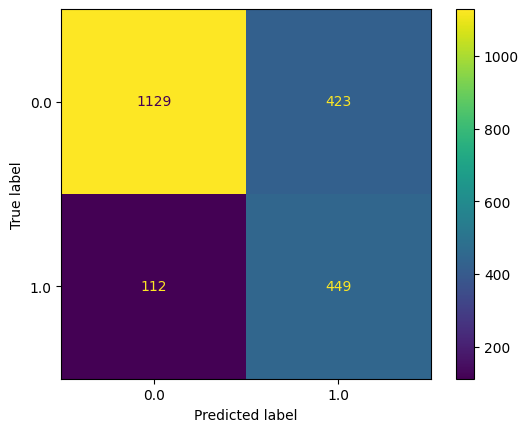

In [62]:
print('Metricas del modelo de Regresion Logistica parametros mejorados + balanceo\n')

print(f' la exactitud del modelo es: {accuracy_score(y_test,modelo_lr_2_y_pred)}')
print(f' la preciion del modelo es: {precision_score(y_test,modelo_lr_2_y_pred)}')
print(f' la sencibilidad(recall) del modelo es: {recall_score(y_test,modelo_lr_2_y_pred)}')
print(f' la F1-Score del modelo es: {f1_score(y_test,modelo_lr_2_y_pred)}')
print('\n')
print(f' la matriz de confucion del modelo es: \n{confusion_matrix(y_test,modelo_lr_2_y_pred)}')
print('\n')
print('El resumen del modelo que muestra las pretricass de presicion, recall y f1-core del modelo \n Regreion Logistica es el siguiente:\n')
print(f'{classification_report(y_test,modelo_lr_2_y_pred)}')
print('\n')
print('Grafica de Matris de Confucion Random Forest \n')
ConfusionMatrixDisplay.from_predictions(y_test,modelo_lr_2_y_pred);

####Resumen de la metricas 3

Comparacion de modelos

| Modelo                  | Exactitud Sin SMOTE | Exactitud + SMOTE | Precisión Sin SMOTE | Precisión + SMOTE | Recall Sin SMOTE | Recall + SMOTE | F1 Sin SMOTE | F1 + SMOTE |
| ----------------------- | ------------------- | ----------------- | ------------------- | ----------------- | ---------------- | -------------- | ------------ | ---------- |
| **Random Forest**       | 0.7946              | 0.7790            | 0.6427              | 0.5805            | 0.5098           | **0.6043**     | 0.5686       | **0.5921** |
| **Regresión Logística** | 0.7984              | 0.7468            | 0.6403              | 0.5149            | 0.5490           | **0.8004**     | 0.5912       | **0.6267** |


**Observaciones**

**Random Forest**

* Recall subió de 0.5098 a 0.6043 (+0.0945), lo que significa que detecta más clientes que se irán.

* F1-score mejoró (0.5686 → 0.5921).

* Precisión bajó (0.6427 → 0.5805), lo esperado al aumentar recall.

* Exactitud bajó ligeramente (0.7946 → 0.7790).

En resumen, SMOTE ayudó a detectar más churn, sacrificando algo de precisión.

**Regresión Logística**

* Recall subió mucho (0.5490 → 0.8004), gran mejora en detección de clientes que se irán.

* F1-score también subió (0.5912 → 0.6267).

* Precisión bajó bastante (0.6403 → 0.5149).

* Exactitud se redujo (0.7984 → 0.7468).

En resumen, SMOTE convirtió la logística en un modelo muy bueno para recall, pero a costa de más falsos positivos.

## <font color=kingblue>Interpretación y Conclusiones

In [63]:
# Supongamos que ya tienes el modelo entrenado como 'modelo_rf' y 'modelo_lr'
# y que X_train_original es el que usaste para entrenar

# 1. Cargar lista de variables limpias
df_final
variables_limpias = [col for col in df_final.columns if col != "Churn"]

# 2. Importancia de Random Forest filtrada
importancias_rf_filtradas = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia":modelo_rf_2.feature_importances_
})

importancias_rf_filtradas = importancias_rf_filtradas[
    importancias_rf_filtradas["Variable"].isin(variables_limpias)
].sort_values(by="Importancia", ascending=False)

print(" Importancias filtradas RF:")
print(importancias_rf_filtradas)

# 3. Acceder al modelo de regresión logística dentro del pipeline
logistic_step = modelo_lr_2.named_steps["model"]

#4.  Crear DataFrame con coeficientes filtrados
importancias_lr_filtradas = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": logistic_step.coef_[0]
})

#5.  Filtrar solo las variables limpias y ordenar por valor absoluto del coeficiente
importancias_lr_filtradas = importancias_lr_filtradas[
    importancias_lr_filtradas["Variable"].isin(variables_limpias)
].sort_values(by="Coeficiente", key=abs, ascending=False)

print("\n Importancias filtradas LR:")
print(importancias_lr_filtradas)


 Importancias filtradas RF:
                                             Variable  Importancia
34     onehotencoder__Tipo de contrato_month-to-month     0.142353
16               onehotencoder__seguridad en linea_no     0.072319
38            onehotencoder__Facturacion en linea_yes     0.033278
35           onehotencoder__Tipo de contrato_one year     0.028306
14    onehotencoder__servicio de internet_fiber optic     0.027243
18              onehotencoder__seguridad en linea_yes     0.024944
27                 onehotencoder__soporte tecnico_yes     0.023026
4                onehotencoder__cliente con pareja_no     0.021658
21                 onehotencoder__backup en linea_yes     0.015794
6          onehotencoder__cliente con dependientes_no     0.013898
0            onehotencoder__genero del cliente_female     0.007573
39  onehotencoder__Metodo de pago_bank transfer (a...     0.007420
40  onehotencoder__Metodo de pago_credit card (aut...     0.007254
24       onehotencoder__proteccion

1. Random Forest – Importancia de variables

Random Forest asigna un valor de importancia a cada variable según cuánto contribuye a reducir la impureza (mejorar la separación entre clases) en los árboles del bosque.

Principales hallazgos:

| Variable                                     | Interpretación                                                                                                                                             |  |
| -------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------- |
| **Tipo de contrato: month-to-month** (0.142) | Muy relevante. Clientes con contrato mensual muestran mayor riesgo de cancelación, ya que tienen más flexibilidad para irse.                            |                |
| **Seguridad en línea: no** (0.072)           | La ausencia de este servicio se asocia con mayor probabilidad de cancelar.                                                                              |                |
| **Facturación en línea: yes** (0.033)        | Un patrón interesante: puede indicar clientes más modernos o más propensos a revisar y cuestionar cargos, lo que podría relacionarse con cancelaciones. |                |
| **Tipo de contrato: one year** (0.028)       | Menor riesgo en comparación con mensual, pero su peso es relevante en el modelo.                                                                        |                |
| **Internet: fiber optic** (0.027)            | Clientes con fibra óptica muestran una relación particular, probablemente ligada a la calidad del servicio o precio.                                    |                |
| **Seguridad en línea: yes** (0.025)          | En este caso aparece también con peso, probablemente diferenciando segmentos de clientes.                                                               |                |
| **Soporte técnico: yes** (0.023)             | Puede reflejar clientes que han necesitado soporte, lo que podría ser indicativo de problemas previos.                                                  |                |


2. Regresión Logística – Coeficientes

En Regresión Logística, el signo del coeficiente indica la dirección del efecto sobre la probabilidad de cancelación:

Positivo (+): aumenta la probabilidad de cancelar.

Negativo (–): disminuye la probabilidad de cancelar.
El valor absoluto indica la magnitud del efecto.

Principales hallazgos:

| Variable                                               |  Interpretación                                                                                                    ||
| ------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------- | -------------- |
| **Internet: fiber optic** (+0.512)                     | Fuerte aumento en la probabilidad de cancelación; posiblemente por costos altos o problemas de servicio.      |                |
| **Tipo de contrato: month-to-month** (+0.301)          | Incrementa notablemente el riesgo de cancelación, confirmando lo visto en RF.                                 |                |
| **Múltiples líneas: yes** (+0.153)                     | Clientes con varias líneas tienen algo más de riesgo, quizá por costos acumulados.                            |                |
| **Protección de dispositivo: yes** (+0.124)            | Ligera asociación positiva, posiblemente un perfil de cliente que adquiere servicios pero no está fidelizado. |                |
| **Facturación en línea: yes** (+0.105)                 | Similar a RF, indica que puede haber un segmento más volátil.                                                 |                |
| **Seguridad en línea: no** (+0.093)                    | Aumenta la probabilidad de cancelar.                                                                          |                |
| **Múltiples líneas: no phone service** (–0.070)        | Disminuye la probabilidad de cancelar; puede corresponder a clientes más estables.                            |                |
| **Servicio telefónico: no** (–0.070)                   | Disminuye el riesgo; posiblemente clientes más enfocados en internet.                                         |                |
| **Método de pago: bank transfer (automatic)** (–0.067) | Disminuye el riesgo, señal de clientes más comprometidos.                                                     |                |


#<font color=kingblue> Conclucion

## Informe Final – Análisis de Cancelación de Clientes (Churn) – Telecom X

# 1. Factores que más influyen en la cancelación

A partir del análisis de **Regresión Logística** y **Random Forest** (modelos seleccionados), y aplicando técnicas de depuración de variables (eliminación de colinealidad y redundancia), se identificaron las variables más relevantes:

## Regresión Logística (coeficientes)

**Impacto positivo** *(incrementa el riesgo de cancelación)*:

- **servicio de internet_fiber optic** (+0.512) → Clientes con fibra óptica tienden a cancelar más.
- **Tipo de contrato_month-to-month** (+0.301) → Contratos mensuales están fuertemente asociados con cancelación.
- **cliente con múltiples líneas_yes** (+0.153) → Ligero aumento de riesgo.
- **protección de dispositivo_yes** (+0.124) → Posible perfil de cliente menos fidelizado.
- **facturación en línea_yes** (+0.105) → Relacionado con perfil más cambiante o sensible a cambios de servicio.

**Impacto negativo** *(reduce el riesgo de cancelación)*:

- **cliente con múltiples líneas_no phone service** (–0.070)
- **servicio telefónico_no** (–0.070)
- **método de pago_bank transfer (automatic)** (–0.067)
- **Tipo de contrato_one year** (–0.058)

---

## Random Forest (importancia de variables)

- **Tipo de contrato_month-to-month** (0.142) – Factor más determinante.
- **seguridad en línea_no** (0.072) – Ausencia de este servicio incrementa el riesgo.
- **facturación en línea_yes** (0.033) – Coincide con LR en relevancia.
- **Tipo de contrato_one year** (0.028) – Relacionado con menor cancelación.
- **servicio de internet_fiber optic** (0.027) – Consistente con LR.
- **soporte técnico_yes** (0.023) – Posible indicador de clientes con incidencias.



## Coincidencia clave

Ambos modelos destacan **contratos mensuales**, **fibra óptica** y **servicios adicionales** (seguridad, soporte) como factores de alto impacto en la cancelación.

---

## Estrategias de retención propuestas

1. **Incentivar contratos a largo plazo** (1 o 2 años) mediante descuentos o beneficios exclusivos.
2. **Revisar experiencia de clientes con fibra óptica**, mejorando soporte y reduciendo problemas técnicos.
3. **Ofrecer seguridad en línea gratuita** por un periodo inicial a nuevos clientes o como beneficio de fidelización.
4. **Promover métodos de pago automáticos** mediante incentivos, dado que se asocian a menor cancelación.
5. **Programa de retención proactiva** enfocado en clientes con múltiples líneas y facturación en línea, para atender necesidades antes de que cancelen.


## 3. Modelo de predicción campeón

Tras las evaluaciones, el modelo campeón es:

**Random Forest** con hiperparámetros optimizados mediante **GridSearchCV + SMOTE**,  
por ofrecer el mejor equilibrio entre **recall** y **F1-score** en el contexto del churn, donde detectar la mayor cantidad posible de clientes que se irán es crítico.

**Serialización del modelo campeón:**

In [66]:
import pickle
modelo_rf_mejor = modelo_rf_2

try:
    with open('champion.pkl', 'wb') as file:
        pickle.dump(modelo_rf_mejor, file)  # modelo_rf_mejor = RF optimizado con SMOTE
    print('Modelo serializado con éxito')
except Exception as e:
    print('Se presentó un error al almacenar el modelo:', str(e))


Modelo serializado con éxito


## 4. Serialización del modelo no campeón

En este caso, el segundo mejor modelo fue la **Regresión Logística optimizada** (sin SMOTE), por su consistencia y capacidad interpretativa.

**Serialización del modelo no campeón:**

In [67]:
modelo_lr_optimizado=modelo_lr_2
try:
    with open('modelo_no_campeon.pkl', 'wb') as file:
        pickle.dump(modelo_lr_optimizado, file)  # modelo_lr_mejor = LR optimizada
    print('Modelo no campeón serializado con éxito')
except Exception as e:
    print('Se presentó un error al almacenar el modelo:', str(e))

Modelo no campeón serializado con éxito


## 5. Conclusión

- **Random Forest optimizado con SMOTE** es el modelo recomendado para producción, gracias a su alta capacidad de detección de clientes en riesgo (recall alto) y buen equilibrio con F1-score.  
- **Regresión Logística optimizada** es útil como modelo de referencia y para análisis interpretativo de factores.  
- Las estrategias propuestas deben integrarse en campañas comerciales y de servicio al cliente, priorizando segmentos con alto riesgo detectados por el modelo.